# AR7111 Preliminary Analysis

In [7]:
# Import modules 
import os 
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [8]:
# Change the working directory
os.chdir('/Users/chelseajimenez/Desktop/Policy-Language-Analysis/data/AR_7111')

In [9]:
# CSV AR 7111 CLeaned Policy PDFs path 
csv_file_path = "/Users/chelseajimenez/Desktop/Policy-Language-Analysis/cleaned_data/AR7111_cleaned_policy_pdfs.csv"

In [10]:
# Use pandas to read CSV file 
data = pd.read_csv(csv_file_path)
extracted_text_column = "AR7111: PDF Text"
# Clean data and drop NaN values 
data = data.dropna(subset=[extracted_text_column])

### Distribution of District-Wide Campus Sustainability Indicators (up to 3) Across School Districts

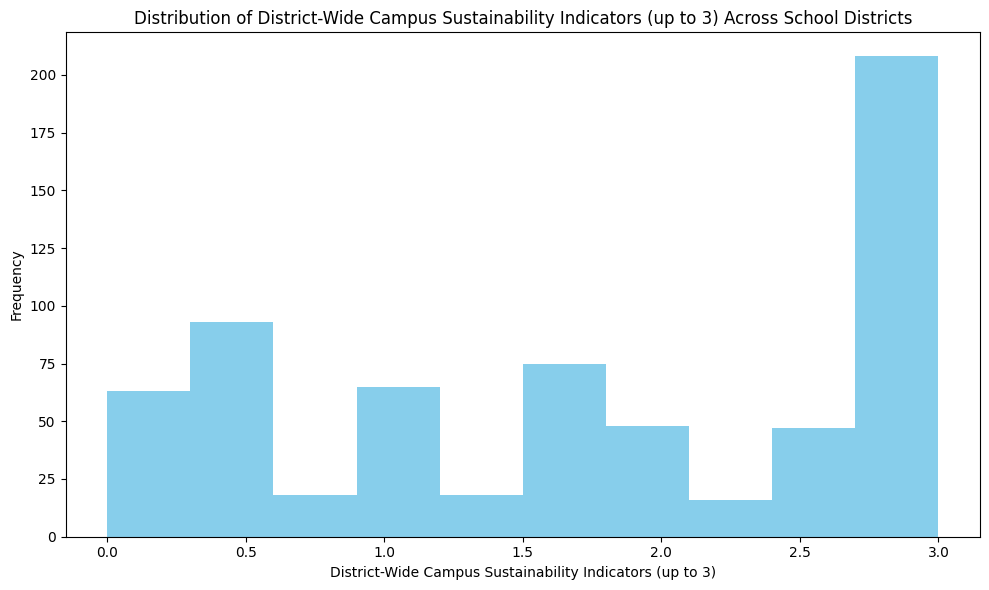

In [15]:
# Distribution of District-Wide Campus Sustainability Indicators (up to 3) Across School Districts
plt.figure(figsize=(10,6))
plt.hist(data["District-Wide Campus Sustainability Indicators (up to 3)"], bins=10, color='skyblue')
plt.xlabel('District-Wide Campus Sustainability Indicators (up to 3)')
plt.ylabel('Frequency')
plt.title('Distribution of District-Wide Campus Sustainability Indicators (up to 3) Across School Districts')
plt.tight_layout()
plt.show()

### Average School Board Policy Campus Sustainability Score by Student Enrollment Range

In [16]:
# Ensure 'Student Enrollment' and 'Campus Sustainability Score' are numeric and drop invalid rows
data['2023-24 Student Enrollment'] = pd.to_numeric(data['2023-24 Student Enrollment'], errors='coerce')
data['District-Wide Campus Sustainability Indicators (up to 3)'] = pd.to_numeric(data['District-Wide Campus Sustainability Indicators (up to 3)'], errors='coerce')
data = data.dropna(subset=['2023-24 Student Enrollment', 'District-Wide Campus Sustainability Indicators (up to 3)'])

Average District-Wide Campus Sustainability Indicators (up to 3) Score by Student Enrollment Range:
Enrollment Range
0-500         1.494444
501-1000      1.483051
1001-5000     1.671315
5001-10000    2.134615
10000+        2.041304
Name: District-Wide Campus Sustainability Indicators (up to 3), dtype: float64


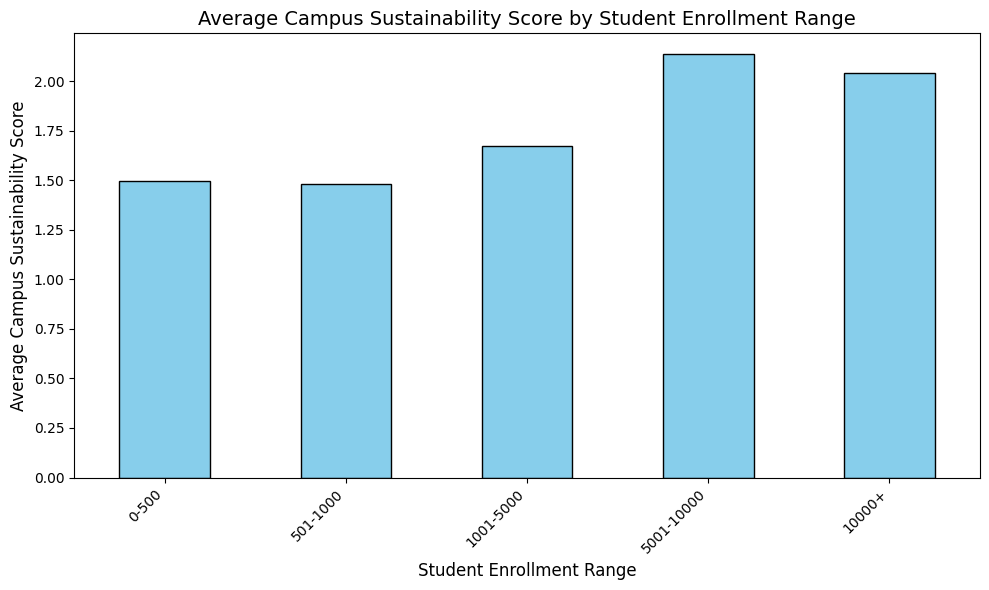

In [17]:
# Create bins for student enrollment ranges
bins = [0, 500, 1000, 5000, 10000, float('inf')]  # Define ranges
labels = ['0-500', '501-1000', '1001-5000', '5001-10000', '10000+']
data['Enrollment Range'] = pd.cut(data['2023-24 Student Enrollment'], bins=bins, labels=labels)

# Calculate average Campus Sustainability Score by enrollment range
grouped_data = data.groupby('Enrollment Range', observed=True)['District-Wide Campus Sustainability Indicators (up to 3)'].mean()

# Display results
print("Average District-Wide Campus Sustainability Indicators (up to 3) Score by Student Enrollment Range:")
print(grouped_data)

# Bar plot for grouped data
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.xlabel('Student Enrollment Range', fontsize=12)
plt.ylabel('Average Campus Sustainability Score', fontsize=12)
plt.title('Average Campus Sustainability Score by Student Enrollment Range', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Word Count within Administrative Regulation 7111

In [18]:
# Function to calculate word count
def word_count(text):
    if pd.notnull(text):  # Check for non-null values
        return len(str(text).split())  # Split text into words and count
    return 0  # Return 0 for missing or invalid text

# Add a word count column
data['word_count'] = data[extracted_text_column].apply(word_count)

# Display the word count for each row with dynamic row numbers
print("Word Counts for Extracted Texts:\n")
for index, row in data.iterrows():
    extracted_text = row[extracted_text_column]
    word_count_value = row['word_count']
    print(f"Row {index + 1} Word Count: {word_count_value}")

Word Counts for Extracted Texts:

Row 1 Word Count: 231
Row 2 Word Count: 209
Row 3 Word Count: 201
Row 5 Word Count: 231
Row 6 Word Count: 233
Row 8 Word Count: 340
Row 9 Word Count: 148
Row 10 Word Count: 232
Row 12 Word Count: 194
Row 13 Word Count: 209
Row 14 Word Count: 201
Row 15 Word Count: 209
Row 17 Word Count: 376
Row 18 Word Count: 204
Row 19 Word Count: 232
Row 20 Word Count: 374
Row 21 Word Count: 297
Row 22 Word Count: 197
Row 23 Word Count: 206
Row 25 Word Count: 198
Row 26 Word Count: 326
Row 27 Word Count: 231
Row 28 Word Count: 231
Row 29 Word Count: 204
Row 30 Word Count: 205
Row 32 Word Count: 235
Row 33 Word Count: 360
Row 34 Word Count: 341
Row 35 Word Count: 262
Row 36 Word Count: 228
Row 37 Word Count: 205
Row 38 Word Count: 351
Row 39 Word Count: 230
Row 40 Word Count: 210
Row 41 Word Count: 187
Row 42 Word Count: 201
Row 43 Word Count: 196
Row 44 Word Count: 233
Row 45 Word Count: 197
Row 46 Word Count: 202
Row 47 Word Count: 232
Row 48 Word Count: 262
Row 49 

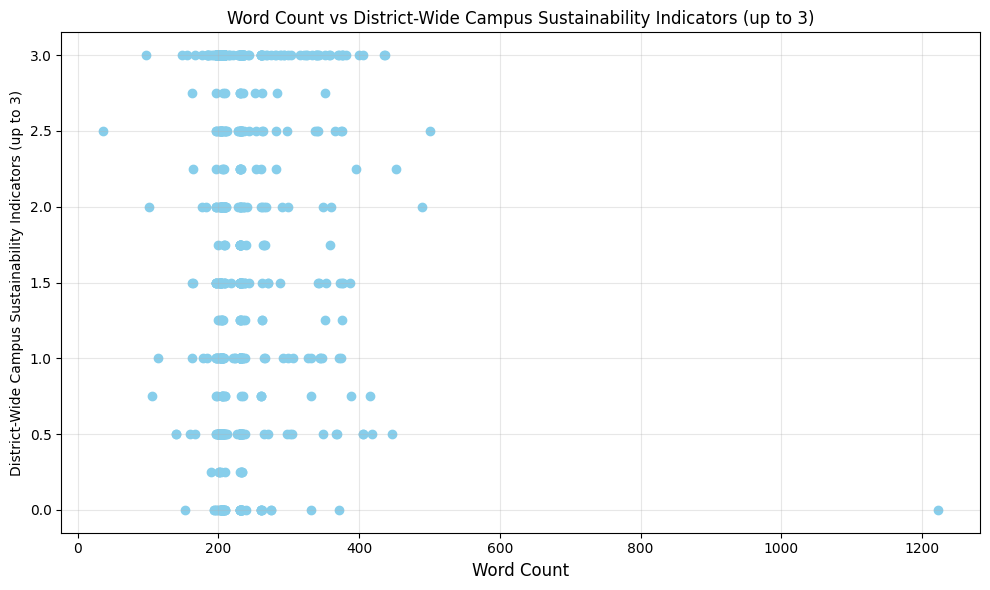

In [19]:
# Plot for word count and Campus Sustainability Score
plt.figure(figsize=(10,6))
plt.scatter(data['word_count'], data['District-Wide Campus Sustainability Indicators (up to 3)'], color='skyblue')
plt.xlabel('Word Count', fontsize=12)
plt.grid(alpha=0.3)
plt.xlabel('Word Count')
plt.ylabel('District-Wide Campus Sustainability Indicators (up to 3)')
plt.title("Word Count vs District-Wide Campus Sustainability Indicators (up to 3)")
plt.tight_layout()

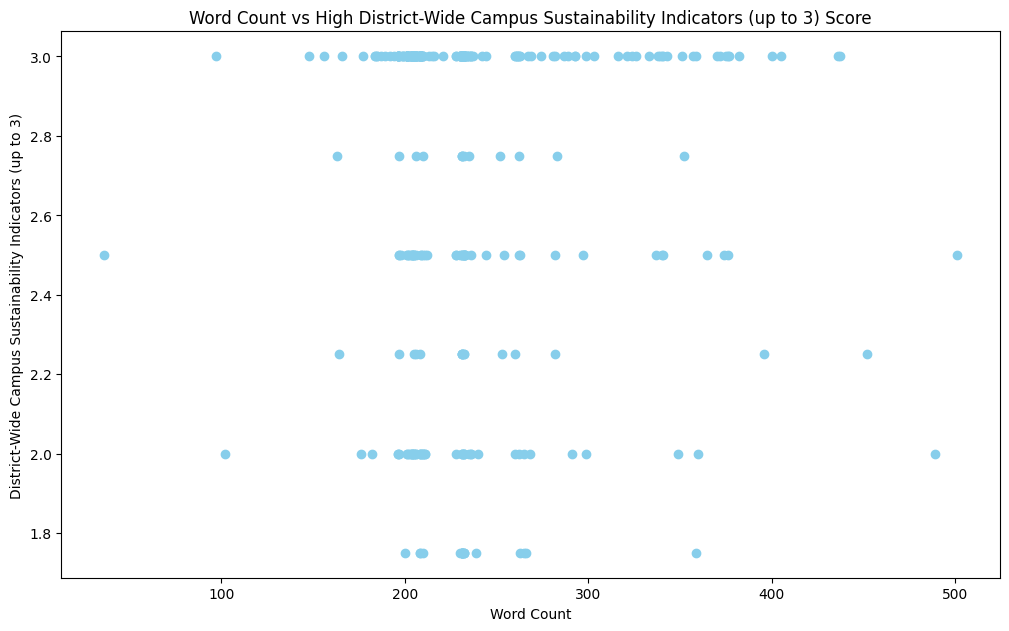

In [20]:
# plot word count and high Campus Sustainability Score- do higher scores means there is a higher word count? 
high_sustainability_data = data[data['District-Wide Campus Sustainability Indicators (up to 3)'] > 1.5]
plt.figure(figsize=(10,6))
plt.scatter(high_sustainability_data['word_count'], high_sustainability_data['District-Wide Campus Sustainability Indicators (up to 3)'], color ='skyblue')
plt.tight_layout()
plt.xlabel('Word Count')
plt.title("Word Count vs High District-Wide Campus Sustainability Indicators (up to 3) Score")
plt.ylabel('District-Wide Campus Sustainability Indicators (up to 3)')
plt.show()

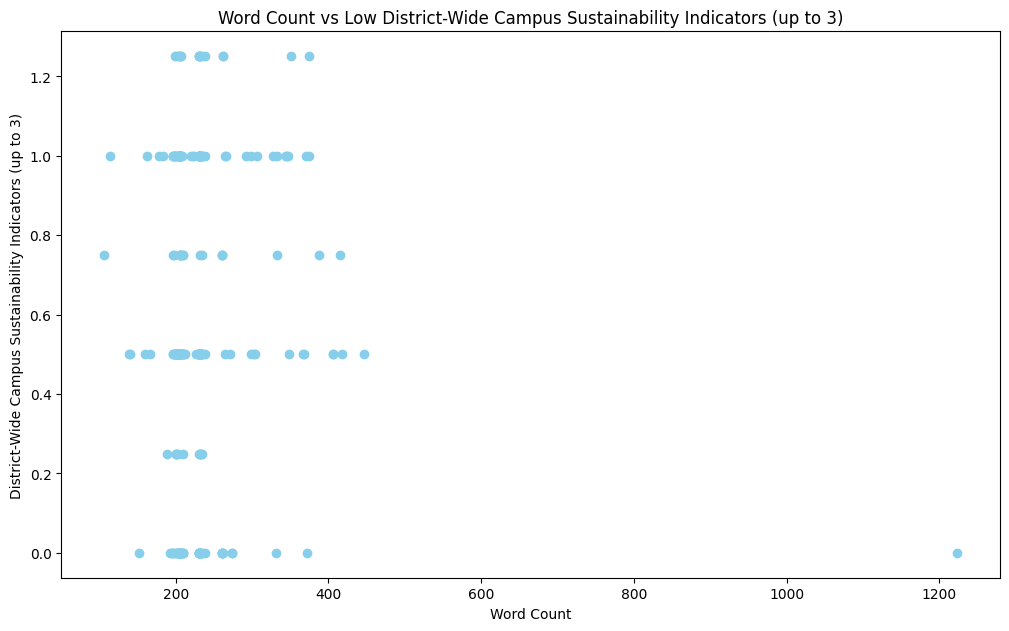

In [21]:
# Plot word count and low sustainability scores- do higher scores means there is a higher word count? 
high_sustainability_data = data[data['District-Wide Campus Sustainability Indicators (up to 3)'] < 1.5]
plt.figure(figsize=(10,6))
plt.scatter(high_sustainability_data['word_count'], high_sustainability_data['District-Wide Campus Sustainability Indicators (up to 3)'], color ='skyblue')
plt.tight_layout()
plt.xlabel('Word Count')
plt.title("Word Count vs Low District-Wide Campus Sustainability Indicators (up to 3)")
plt.ylabel('District-Wide Campus Sustainability Indicators (up to 3)')
plt.show()

In [22]:
# Find average word count for Campus Sustainability Score of 3 
sustainability_score_three = data[data['District-Wide Campus Sustainability Indicators (up to 3)'] == 3]
average_word_count = sustainability_score_three['word_count'].mean()
print(f"The average word count for District-Wide Campus Sustainability Indicators Score of 3 is: {average_word_count:.2f}")

The average word count for District-Wide Campus Sustainability Indicators Score of 3 is: 235.09


In [23]:
# Find average word count for Campus Sustainability Scores below 1.5 
sustainability_score_three = data[data['District-Wide Campus Sustainability Indicators (up to 3)'] < 1.5]
average_word_count = sustainability_score_three['word_count'].mean()
print(f"The average word count for District-Wide Campus Sustainability Indicators Score below 1.5 is: {average_word_count:.2f}")

The average word count for District-Wide Campus Sustainability Indicators Score below 1.5 is: 233.91


### Average Campus Sustainability Score by Word Count Range

In [24]:
# Create word count bins
data['Word Count Range'] = pd.cut(data['word_count'], bins=[0, 100, 200, 300, 400, float('inf')], 
                                  labels=['0-100', '101-200', '201-300', '301-400', '400+'])

# Calculate average Campus Sustainability Score for each range
avg_score_by_range = data.groupby('Word Count Range', observed= True)['District-Wide Campus Sustainability Indicators (up to 3)'].mean()

# Print the result
print("Average Campus Sustainability Score by Word Count Range:")
print(avg_score_by_range)

Average Campus Sustainability Score by Word Count Range:
Word Count Range
0-100      2.750000
101-200    1.725000
201-300    1.727455
301-400    1.961207
400+       1.541667
Name: District-Wide Campus Sustainability Indicators (up to 3), dtype: float64


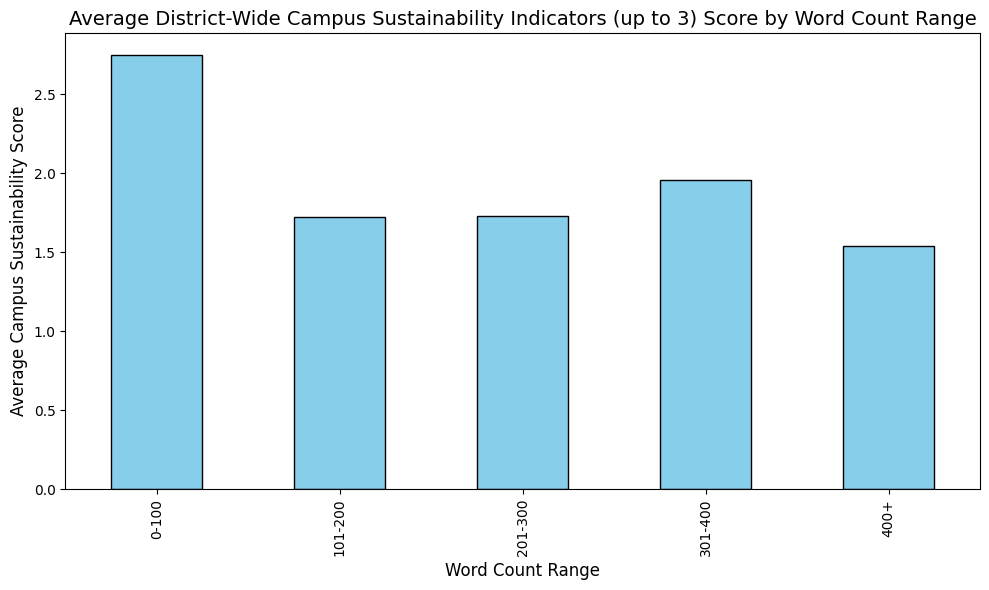

In [25]:
# Bar plot for grouped data
avg_score_by_range.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.xlabel('Word Count Range', fontsize=12)
plt.ylabel('Average Campus Sustainability Score', fontsize=12)
plt.title('Average District-Wide Campus Sustainability Indicators (up to 3) Score by Word Count Range', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

### Word Frequency within Administrative Regulation 7111

In [27]:
# Calculate word frequency 
def word_frequency(text):
    if pd.notnull(text):
        words = str(text).lower().split()
        return Counter(words)
    return Counter()
extracted_text_column = "AR7111: PDF Text"
data['word_frequency'] = data[extracted_text_column].apply(word_frequency)

for index, row in data.iterrows():
    print(f"Row {index + 1} Word Frequency:")
    filtered_words = {word: count for word, count in row['word_frequency'].items() if count > 6 and word != 'cf'}
    print(filtered_words)
    print("-" * 80)

Row 1 Word Frequency:
{'building': 12, 'shall': 8, 'district': 7, 'education': 7}
--------------------------------------------------------------------------------
Row 2 Word Frequency:
{'building': 10, 'shall': 8, 'district': 7}
--------------------------------------------------------------------------------
Row 3 Word Frequency:
{'facility': 8, 'school': 12}
--------------------------------------------------------------------------------
Row 5 Word Frequency:
{'building': 12, 'shall': 8, 'district': 7}
--------------------------------------------------------------------------------
Row 6 Word Frequency:
{'building': 12, 'shall': 7, 'district': 7, 'education': 7}
--------------------------------------------------------------------------------
Row 8 Word Frequency:
{'school': 15, 'district': 9, 'facility': 11, 'building': 12, 'shall': 8, 'energy': 8}
--------------------------------------------------------------------------------
Row 9 Word Frequency:
{'school': 9}
---------------------

In [28]:
# Aggregate word frequencies across all rows
aggregate_frequency = Counter()
for freq in data['word_frequency']:
    aggregate_frequency.update(freq)

# Filter out low-frequency and irrelevant words
filtered_aggregate_frequency = {word: count for word, count in aggregate_frequency.items() if count > 6 and word not in ['cf', 's']}

# Display the top 20 most frequent words
print("Top 20 Frequent Words Across All Policies:")
Counter(filtered_aggregate_frequency).most_common(20)

Top 20 Frequent Words Across All Policies:


[('building', 7102),
 ('shall', 5070),
 ('district', 4591),
 ('school', 4272),
 ('energy', 3380),
 ('code', 3181),
 ('education', 3094),
 ('structural', 3043),
 ('facility', 2569),
 ('safety', 2558),
 ('designee', 2491),
 ('existing', 2308),
 ('board', 2260),
 ('superintendent', 2221),
 ('repair', 1849),
 ('service', 1657),
 ('may', 1621),
 ('requirement', 1448),
 ('meet', 1443),
 ('legal', 1394)]

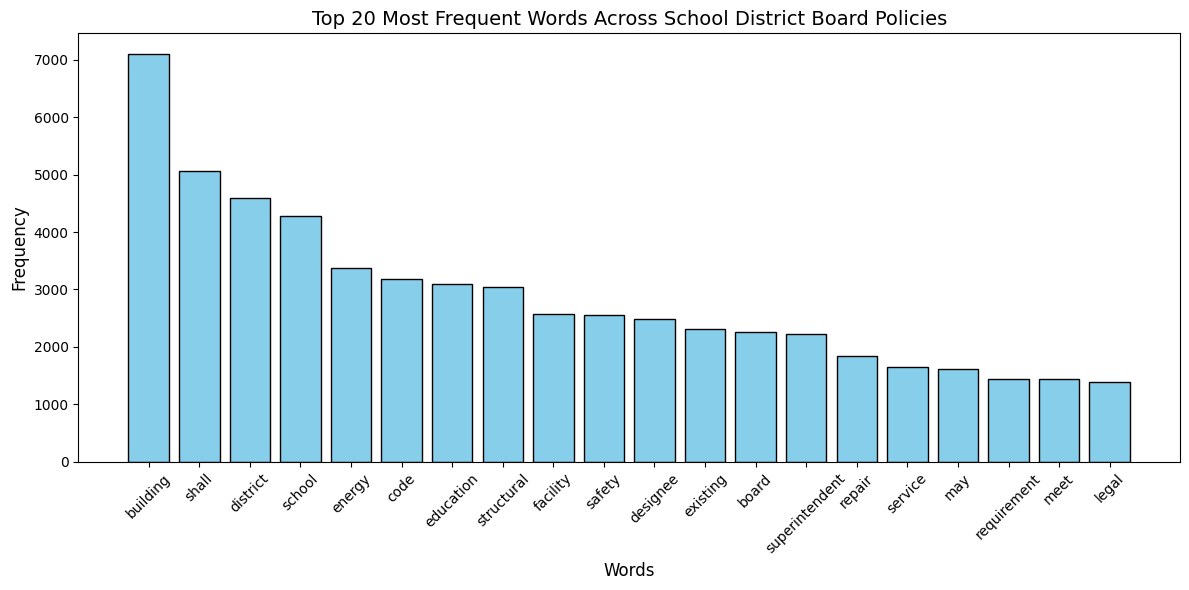

In [29]:
# Get the top 20 frequent words
top_words = Counter(filtered_aggregate_frequency).most_common(20)
words, counts = zip(*top_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Frequent Words Across School District Board Policies', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

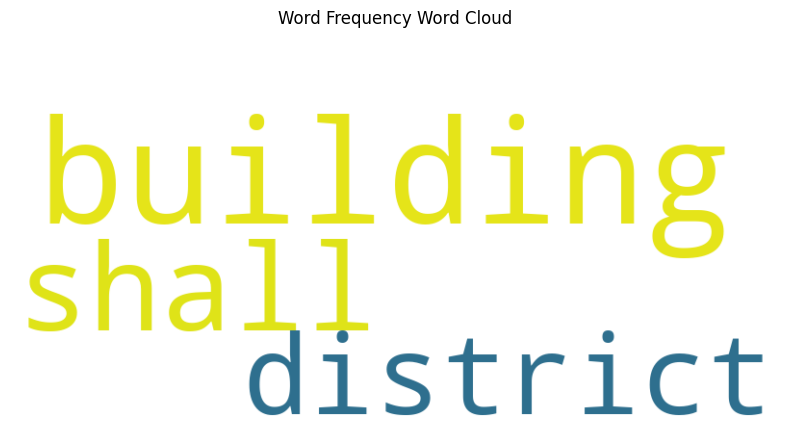

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Word Cloud')
plt.show

# Indicator Analysis 

### Energy Efficiency

In [31]:
# Calculate the total number of 0s and 1s in the Energy Efficiency column
energy_efficiency_counts = data['Energy Efficiency'].value_counts()

# Display the counts
print("Counts in the 'Energy Efficiency' column:")
print(energy_efficiency_counts)

Counts in the 'Energy Efficiency' column:
Energy Efficiency
0    346
1    305
Name: count, dtype: int64


In [33]:
# List of keywords to filter for Energy Efficiency Indicator 
keywords = ['school energy conservation programs', 'energy-saving initiatives', 'energy efficiency']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Energy Efficiency'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Energy Efficiency' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Energy Efficiency']]

Number of policies containing the keyword(s) ['school energy conservation programs', 'energy-saving initiatives', 'energy efficiency']: 625

Total counts in the 'Energy Efficiency' column:
Energy Efficiency
0    332
1    293
Name: count, dtype: int64

Keyword occurrences:
'school energy conservation programs': 0
'energy-saving initiatives': 0
'energy efficiency': 627

Policies containing any of the words ['school energy conservation programs', 'energy-saving initiatives', 'energy efficiency']:


,District Name,AR7111: PDF Text,Energy Efficiency
0,Alameda Unified,regulation 7111 evaluating existing building s...,1
1,Albany City Unified,regulation 7111 evaluating existing building s...,1
4,Hayward Unified,regulation 7111 evaluating existing building s...,0
5,Livermore Valley Joint Unified,regulation 7111 evaluating existing building s...,0
7,New Haven Unified,new unified school district administrative reg...,1
...,...,...,...
674,Winters Joint Unified,facility ar 7111 evaluating existing building ...,0
675,Woodland Joint Unified,regulation 7111 evaluating existing building s...,0
676,Marysville Joint Unified,regulation 7111 evaluating existing building s...,1
677,Plumas Lake Elementary,regulation 7111 evaluating existing building s...,0


### On-Site Renewables

In [34]:
# Calculate the total number of 0s and 1s in the On-Site Renewables column
onsite_renewables_counts = data['On-Site Renewables'].value_counts()

# Display the counts
print("Counts in the 'On-Site Renewables' column:")
print(onsite_renewables_counts)

Counts in the 'On-Site Renewables' column:
On-Site Renewables
0    382
1    269
Name: count, dtype: int64


In [35]:
# List of keywords to filter for On-Site Renewables Indicator 
keywords = ['on-site renewable energy', 'solar power', 'wind energy', 'renewable energy']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['On-Site Renewables'].value_counts()

# Display the total counts
print("\nTotal counts in the 'On-Site Renewables' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'On-Site Renewables']]

Number of policies containing the keyword(s) ['on-site renewable energy', 'solar power', 'wind energy', 'renewable energy']: 0

Total counts in the 'On-Site Renewables' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'on-site renewable energy': 0
'solar power': 0
'wind energy': 0
'renewable energy': 0

Policies containing any of the words ['on-site renewable energy', 'solar power', 'wind energy', 'renewable energy']:


,District Name,AR7111: PDF Text,On-Site Renewables


### HVAC: AC

In [36]:
# Calculate the total number of 0s and 1s in the HVAC: AC column
HVAC_AC_counts = data['HVAC: AC'].value_counts()

# Display the counts
print("Counts in the 'HVAC: AC' column:")
print(HVAC_AC_counts)

Counts in the 'HVAC: AC' column:
HVAC: AC
1.0    374
0.0    250
Name: count, dtype: int64


In [37]:
# List of keywords to filter for HVAC: AC Indicator 
keywords = ['HVAC systems', 'air conditioning upgrades', 'energy efficient HVAC school buildings', 'HVAC', 'air conditioning']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['HVAC: AC'].value_counts()

# Display the total counts
print("\nTotal counts in the 'HVAC: AC' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'HVAC: AC']]

Number of policies containing the keyword(s) ['HVAC systems', 'air conditioning upgrades', 'energy efficient HVAC school buildings', 'HVAC', 'air conditioning']: 0

Total counts in the 'HVAC: AC' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'HVAC systems': 0
'air conditioning upgrades': 0
'energy efficient HVAC school buildings': 0
'HVAC': 0
'air conditioning': 0

Policies containing any of the words ['HVAC systems', 'air conditioning upgrades', 'energy efficient HVAC school buildings', 'HVAC', 'air conditioning']:


,District Name,AR7111: PDF Text,HVAC: AC


### Indoor Air Quality

In [38]:
# Calculate the total number of 0s and 1s in the Indoor Air Quality column
indoor_air_quality_counts = data['Indoor Air Quality'].value_counts()

# Display the counts
print("Counts in the 'Indoor Air Quality' column:")
print(indoor_air_quality_counts)

Counts in the 'Indoor Air Quality' column:
Indoor Air Quality
0.0    344
1.0    279
Name: count, dtype: int64


In [39]:
# List of keywords to filter for Indoor Air Quality Indicator 
keywords = ['indoor air quality', 'air filtration systems', 'air filtration', 'healthy air school initiative', 'air quality', 'IEQ', 'IEQ (Indoor Environmental Quality) Initiative']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Indoor Air Quality'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Indoor Air Quality' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Indoor Air Quality']]

Number of policies containing the keyword(s) ['indoor air quality', 'air filtration systems', 'air filtration', 'healthy air school initiative', 'air quality', 'IEQ', 'IEQ (Indoor Environmental Quality) Initiative']: 0

Total counts in the 'Indoor Air Quality' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'indoor air quality': 0
'air filtration systems': 0
'air filtration': 0
'healthy air school initiative': 0
'air quality': 0
'IEQ': 0
'IEQ (Indoor Environmental Quality) Initiative': 0

Policies containing any of the words ['indoor air quality', 'air filtration systems', 'air filtration', 'healthy air school initiative', 'air quality', 'IEQ', 'IEQ (Indoor Environmental Quality) Initiative']:


,District Name,AR7111: PDF Text,Indoor Air Quality


### Energy Resilience 

In [40]:
# Calculate the total number of 0s and 1s in the Energy Resilience column
energy_resilience_counts = data['Energy Resilience'].value_counts()

# Display the counts
print("Counts in the 'Energy Resilience' column:")
print(energy_resilience_counts)

Counts in the 'Energy Resilience' column:
Energy Resilience
0    467
1    184
Name: count, dtype: int64


In [41]:
# List of keywords to filter for Energy Resilience Indicator 
keywords = ['energy resilience', 'energy backup', 'renewable energy storage', 'renewable energy', 'energy storage']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Energy Resilience'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Energy Resilience' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Energy Resilience']]

Number of policies containing the keyword(s) ['energy resilience', 'energy backup', 'renewable energy storage', 'renewable energy', 'energy storage']: 0

Total counts in the 'Energy Resilience' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'energy resilience': 0
'energy backup': 0
'renewable energy storage': 0
'renewable energy': 0
'energy storage': 0

Policies containing any of the words ['energy resilience', 'energy backup', 'renewable energy storage', 'renewable energy', 'energy storage']:


,District Name,AR7111: PDF Text,Energy Resilience


### Fleet Electrification

In [42]:
# Calculate the total number of 0s and 1s in the EV Chargers for Fleet Electrification column
fleet_electrification_counts = data['Fleet Electrification'].value_counts()

# Display the counts
print("Counts in the 'Fleet Electrification' column:")
print(fleet_electrification_counts)

Counts in the 'Fleet Electrification' column:
Fleet Electrification
0.0    539
1.0    110
Name: count, dtype: int64


In [43]:
# List of keywords to filter for Fleet Electrification Indicator 
keywords = ['electric school buses', 'fleet electrification schools', 'school district EV fleet', 'electric school bus', 'electric vehicle']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Fleet Electrification'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Fleet Electrification' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Fleet Electrification']]

Number of policies containing the keyword(s) ['electric school buses', 'fleet electrification schools', 'school district EV fleet', 'electric school bus', 'electric vehicle']: 0

Total counts in the 'Fleet Electrification' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'electric school buses': 0
'fleet electrification schools': 0
'school district EV fleet': 0
'electric school bus': 0
'electric vehicle': 0

Policies containing any of the words ['electric school buses', 'fleet electrification schools', 'school district EV fleet', 'electric school bus', 'electric vehicle']:


,District Name,AR7111: PDF Text,Fleet Electrification


### EV Chargers for Parking (not fleet)

In [347]:
# Calculate the total number of 0s and 1s in the EV Chargers for Parking (not fleet) column
EV_chargers_counts = data['EV Chargers for Parking'].value_counts()

# Display the counts
print("Counts in the 'EV Chargers for Parking' column:")
print(EV_chargers_counts)

Counts in the 'EV Chargers for Parking' column:
EV Chargers for Parking
0.0    500
1.0     72
Name: count, dtype: int64


In [44]:
# List of keywords to filter for EV Chargers for Parking (not fleet) Indicator 
keywords = ['school EV charging stations', 'electric vehicle chargers schools', 'public EV charging school parking']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['EV Chargers for Parking'].value_counts()

# Display the total counts
print("\nTotal counts in the 'EV Chargers for Parking' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'EV Chargers for Parking']]

Number of policies containing the keyword(s) ['school EV charging stations', 'electric vehicle chargers schools', 'public EV charging school parking']: 0

Total counts in the 'EV Chargers for Parking' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'school EV charging stations': 0
'electric vehicle chargers schools': 0
'public EV charging school parking': 0

Policies containing any of the words ['school EV charging stations', 'electric vehicle chargers schools', 'public EV charging school parking']:


,District Name,AR7111: PDF Text,EV Chargers for Parking


### Water Conservation

In [45]:
# Calculate the total number of 0s and 1s in the Water Conservation column
water_conservation_counts = data['Water Conservation'].value_counts()

# Display the counts
print("Counts in the 'Water Conservation' column:")
print(water_conservation_counts)

Counts in the 'Water Conservation' column:
Water Conservation
0    472
1    179
Name: count, dtype: int64


In [46]:
# List of keywords to filter for Water Conservation Indicator 
# added water conservation, water efficiency, water-saving
keywords = ['water conservation in schools', 'school district water-saving', 'water efficiency educational institutions', 'water conservation', 'water efficiency', 'water-saving']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Water Conservation'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Water Conservation' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Water Conservation']]

Number of policies containing the keyword(s) ['water conservation in schools', 'school district water-saving', 'water efficiency educational institutions', 'water conservation', 'water efficiency', 'water-saving']: 54

Total counts in the 'Water Conservation' column:
Water Conservation
0    37
1    17
Name: count, dtype: int64

Keyword occurrences:
'water conservation in schools': 0
'school district water-saving': 0
'water efficiency educational institutions': 0
'water conservation': 54
'water efficiency': 0
'water-saving': 0

Policies containing any of the words ['water conservation in schools', 'school district water-saving', 'water efficiency educational institutions', 'water conservation', 'water efficiency', 'water-saving']:


,District Name,AR7111: PDF Text,Water Conservation
8,Piedmont City Unified,piedmont unified school district administrativ...,1
16,Chico Unified,chico unified school district 1163 east sevent...,1
19,Oroville Union High,oroville union high school district ar 7111 fa...,0
20,Palermo Union Elementary,facility ar 711 1 evaluating existing building...,1
34,Byron Union Elementary,regulation 7111 evaluating existing building s...,1
62,Fresno Unified,fresno usd 7000 ar 7111 facility evaluating ex...,1
97,South Bay Union Elementary,regulation 7111 evaluating existing building s...,1
173,ABC Unified,ar 7111 abc unified school district administra...,0
184,Culver City Unified,ar 7111 http wwwccusdk12causboard_edpolicies70...,0
186,Eastside Union Elementary,regulation 7111 evaluating existing building s...,0


### Zero Waste Initiative

In [47]:
# Calculate the total number of 0s and 1s in the Zero Waste Initiative column
zero_waste_counts = data['Zero Waste Initiative'].value_counts()

# Display the counts
print("Counts in the 'Zero Waste Initiative' column:")
print(zero_waste_counts)

Counts in the 'Zero Waste Initiative' column:
Zero Waste Initiative
0    507
1    144
Name: count, dtype: int64


In [48]:
# List of keywords to filter for Zero Waste Initiative Indicator 
keywords = ['zero waste schools', 'waste reduction initiatives', 'school district recycling programs', 'recycling', 'waste reduction', 'zero waste']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Zero Waste Initiative'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Zero Waste Initiative' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Zero Waste Initiative']]

Number of policies containing the keyword(s) ['zero waste schools', 'waste reduction initiatives', 'school district recycling programs', 'recycling', 'waste reduction', 'zero waste']: 1

Total counts in the 'Zero Waste Initiative' column:
Zero Waste Initiative
1    1
Name: count, dtype: int64

Keyword occurrences:
'zero waste schools': 0
'waste reduction initiatives': 0
'school district recycling programs': 0
'recycling': 1
'waste reduction': 0
'zero waste': 0

Policies containing any of the words ['zero waste schools', 'waste reduction initiatives', 'school district recycling programs', 'recycling', 'waste reduction', 'zero waste']:


,District Name,AR7111: PDF Text,Zero Waste Initiative
429,Solana Beach Elementary,cambrian school district board policy policy 3...,1


### Schoolyard Forest

In [49]:
# Calculate the total number of 0s and 1s in the Schoolyard Forest column
schoolyard_forest_counts = data['Schoolyard Forest'].value_counts()

# Display the counts
print("Counts in the 'Schoolyard Forest' column:")
print(schoolyard_forest_counts)

Counts in the 'Schoolyard Forest' column:
Schoolyard Forest
0    615
1     36
Name: count, dtype: int64


In [50]:
# List of keywords to filter for Schoolyard Forest Indicator 
keywords = ['schoolyard forest program', 'urban forestry schools', 'tree planting educational campus', 'forest', 'planting']
# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Schoolyard Forest'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Schoolyard Forest' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'Schoolyard Forest']]

Number of policies containing the keyword(s) ['schoolyard forest program', 'urban forestry schools', 'tree planting educational campus', 'forest', 'planting']: 2

Total counts in the 'Schoolyard Forest' column:
Schoolyard Forest
0    2
Name: count, dtype: int64

Keyword occurrences:
'schoolyard forest program': 0
'urban forestry schools': 0
'tree planting educational campus': 0
'forest': 3
'planting': 0

Policies containing any of the words ['schoolyard forest program', 'urban forestry schools', 'tree planting educational campus', 'forest', 'planting']:


,District Name,AR7111: PDF Text,Schoolyard Forest
332,Foresthill Union Elementary,regulation 7111 evaluating existing building s...,0
568,Forestville Union Elementary,evaluating existing building ar 7111 facility ...,0


### School Gardens

In [51]:
# Calculate the total number of 0s and 1s in the School Gardens column
school_gardens_counts = data['School Gardens'].value_counts()

# Display the counts
print("Counts in the 'School Gardens' column:")
print(school_gardens_counts)

Counts in the 'School Gardens' column:
School Gardens
1    332
0    319
Name: count, dtype: int64


In [53]:
# List of keywords to filter for School Gardens Indicator 
keywords = ['school garden projects', 'edible gardens in schools', 'educational gardens school district', 'interactive gardens', 'garden', 'native gardens', 'gardens']
# Filter policies
policies_with_keywords_in_text = data[data["AR7111: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['School Gardens'].value_counts()

# Display the total counts
print("\nTotal counts in the 'School Gardens' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["AR7111: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'AR7111: PDF Text', 'School Gardens']]

Number of policies containing the keyword(s) ['school garden projects', 'edible gardens in schools', 'educational gardens school district', 'interactive gardens', 'garden', 'native gardens', 'gardens']: 0

Total counts in the 'School Gardens' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'school garden projects': 0
'edible gardens in schools': 0
'educational gardens school district': 0
'interactive gardens': 0
'garden': 0
'native gardens': 0
'gardens': 0

Policies containing any of the words ['school garden projects', 'edible gardens in schools', 'educational gardens school district', 'interactive gardens', 'garden', 'native gardens', 'gardens']:


,District Name,AR7111: PDF Text,School Gardens


### Indicators Summary

Indicator Summary:
                    Indicator  Count_1s  Count_0s
0   Building Electrification     241.0     410.0
1          Energy Efficiency     305.0     346.0
2         On-Site Renewables     269.0     382.0
3                   HVAC: AC     374.0     277.0
4         Indoor Air Quality     279.0     372.0
5          Energy Resilience     184.0     467.0
6      Fleet Electrification     110.0     541.0
7    EV Chargers for Parking      75.0     576.0
8         Water Conservation     179.0     472.0
9      Zero Waste Initiative     144.0     507.0
10         Schoolyard Forest      36.0     615.0
11            School Gardens     332.0     319.0


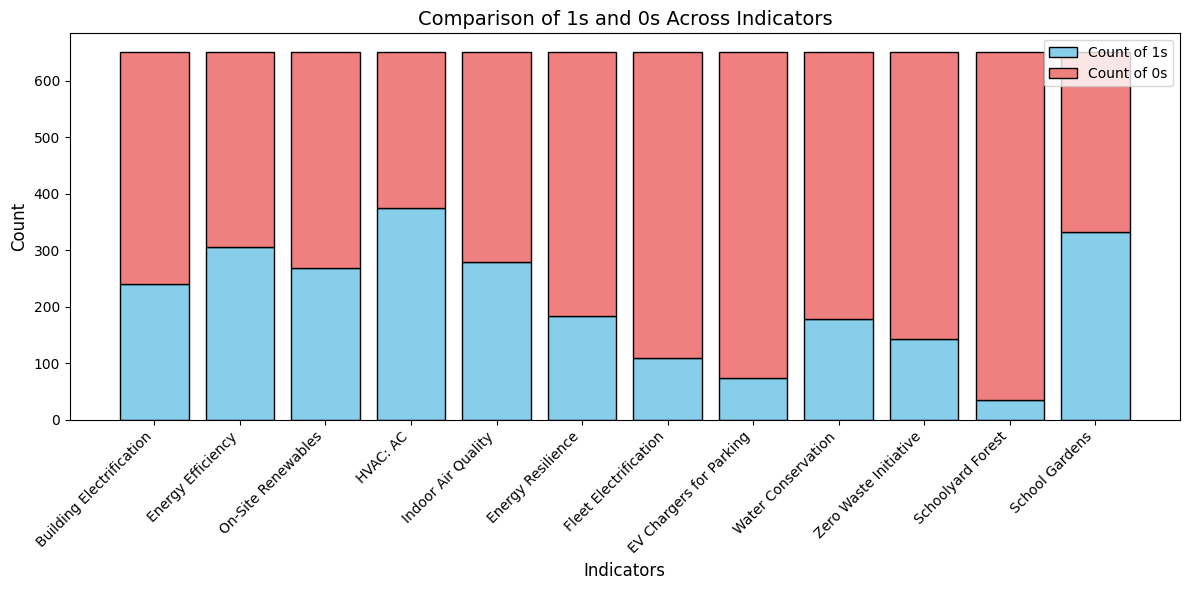

In [54]:
# List of indicator columns 
indicator_columns = ['Building Electrification', 'Energy Efficiency', 'On-Site Renewables', 'HVAC: AC', 'Indoor Air Quality', 'Energy Resilience', 'Fleet Electrification', 'EV Chargers for Parking', 'Water Conservation', 'Zero Waste Initiative', 'Schoolyard Forest', 'School Gardens']  

# Calculate the counts of 1s and 0s for each indicator
indicator_summary = pd.DataFrame({
    'Indicator': indicator_columns,
    'Count_1s': [data[col].sum() for col in indicator_columns],  
    'Count_0s': [len(data[col]) - data[col].sum() for col in indicator_columns]  
})

# Display summary table
print("Indicator Summary:\n", indicator_summary)

# Plot the results
plt.figure(figsize=(12, 6))

# Stacked bar chart for counts of 1s and 0s
plt.bar(indicator_summary['Indicator'], indicator_summary['Count_1s'], label='Count of 1s', color='skyblue', edgecolor='black')
plt.bar(indicator_summary['Indicator'], indicator_summary['Count_0s'], bottom=indicator_summary['Count_1s'], label='Count of 0s', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Indicators', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Comparison of 1s and 0s Across Indicators', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()